In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn import cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.import linear_model
%matplotlib inline

In [7]:
auto = pd.read_csv('data/auto.csv')
auto.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,3,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,4,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,5,17,8,302,140,3449,10.5,70,1,ford torino


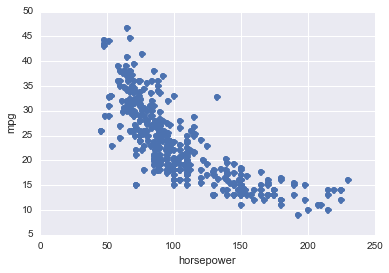

In [13]:
plt.plot(auto.horsepower,auto.mpg,'o')
plt.ylabel('mpg')
plt.xlabel('horsepower')

In [38]:
X = auto[['horsepower','acceleration','weight']].values

In [48]:
rng = np.random.RandomState(0)

In [49]:
rng.permutation(10)

array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5])

In [101]:
X= np.array(range(24))
X = X.reshape(6,4)

In [102]:
kf = cross_validation.KFold(n=len(X),n_folds=5,shuffle=True)

In [107]:
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print 'Xtrain',X_train
    print
    print 'X_test',X_test
    print


('TRAIN:', array([1, 2, 3, 4]), 'TEST:', array([0, 5]))
Xtrain [[ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]

X_test [[ 0  1  2  3]
 [20 21 22 23]]

('TRAIN:', array([0, 1, 2, 3, 5]), 'TEST:', array([4]))
Xtrain [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]]

X_test [[16 17 18 19]]

('TRAIN:', array([0, 1, 2, 4, 5]), 'TEST:', array([3]))
Xtrain [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [16 17 18 19]
 [20 21 22 23]]

X_test [[12 13 14 15]]

('TRAIN:', array([0, 1, 3, 4, 5]), 'TEST:', array([2]))
Xtrain [[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

X_test [[ 8  9 10 11]]

('TRAIN:', array([0, 2, 3, 4, 5]), 'TEST:', array([1]))
Xtrain [[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

X_test [[4 5 6 7]]



In [76]:
poly = PolynomialFeatures(2)
fit = poly.fit_transformed(X)

array([[  165. ,    11.5,  3693. ],
       [  150. ,    11. ,  3436. ],
       [  150. ,    12. ,  3433. ],
       [  140. ,    10.5,  3449. ],
       [  198. ,    10. ,  4341. ],
       [  220. ,     9. ,  4354. ],
       [  215. ,     8.5,  4312. ],
       [  225. ,    10. ,  4425. ],
       [  190. ,     8.5,  3850. ]])